<a href="https://colab.research.google.com/github/wooje-jung/class-project/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%20-%20Bitcoinprice%20Prediction/%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_%EA%B0%80%EA%B2%A9%EA%B3%BC_%EC%9D%B4%EC%8A%88%EC%99%80%EC%9D%98_%EA%B4%80%EB%A0%A8%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0. 모듈 설치

In [25]:
!pip install pyupbit

In [26]:
!pip install selenium

#1. 비트코인 가격정보 수집


1.   수집대상 : 업비트 -> 비트코인 시가
2.   수집날짜 : 2017-09-25 ~ 2023.11.01



In [27]:
import pyupbit
import pandas as pd

In [28]:
pyupbit.get_tickers(fiat='KRW')

['KRW-BTC',
 'KRW-ETH',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-ADA',
 'KRW-SBD',
 'KRW-POWR',
 'KRW-BTG',
 'KRW-ICX',
 'KRW-EOS',
 'KRW-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLYX',
 'KRW-ZRX',
 'KRW-LOOM',
 'KRW-BCH',
 'KRW-BAT',
 'KRW-IOST',
 'KRW-CVC',
 'KRW-IQ',
 'KRW-IOTA',
 'KRW-HIFI',
 'KRW-ONG',
 'KRW-GAS',
 'KRW-UPP',
 'KRW-ELF',
 'KRW-KNC',
 'KRW-BSV',
 'KRW-THETA',
 'KRW-QKC',
 'KRW-BTT',
 'KRW-MOC',
 'KRW-TFUEL',
 'KRW-MANA',
 'KRW-ANKR',
 'KRW-AERGO',
 'KRW-ATOM',
 'KRW-TT',
 'KRW-CRE',
 'KRW-MBL',
 'KRW-WAXP',
 'KRW-HBAR',
 'KRW-MED',
 'KRW-MLK',
 'KRW-STPT',
 'KRW-ORBS',
 'KRW-VET',
 'KRW-CHZ',
 'KRW-STMX',
 'KRW-DKA',
 'KRW-HIVE',
 'KRW-KAVA',
 'KRW-AHT',
 'KRW-LINK',
 'KRW-XTZ',
 'KRW-BORA',
 'KRW-JST',
 'KRW-CRO',
 'KRW-TON',
 'KRW-SXP',
 'KRW-HUNT',
 'KRW-PLA',
 'KRW-DOT',
 'KRW-MVL',
 'KRW-STRAX',
 'KRW-A

In [29]:
ticker = 'KRW-BTC'
interval = 'day'
to = '2023-11-01 09:00 '
count = 2292
data_price = pyupbit.get_ohlcv(ticker=ticker,interval=interval,to=to,count=count)
data_price = pd.DataFrame(data_price)
data_price['Price'] = 0
for i in range(0, 120):
    if data_price['open'][i] < data_price['open'][i+1]:
        data_price['Price'][i] = 1
    else:
        data_price['Price'][i] = 0
open_data_price = [['open','Price']]


<ipython-input-29-7e7fb7578394>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_price['Price'][i] = 1
<ipython-input-29-7e7fb7578394>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_price['Price'][i] = 0


In [30]:
data_price
open_data_price = data_price[['open','Price']]
open_data_price

,open,Price
2017-09-25 09:00:00,4201000.0,1
2017-09-26 09:00:00,4317000.0,1
2017-09-27 09:00:00,4322000.0,1
2017-09-28 09:00:00,4657000.0,0
2017-09-29 09:00:00,4586000.0,1
...,...,...
2023-10-28 09:00:00,45980000.0,0
2023-10-29 09:00:00,46316000.0,0
2023-10-30 09:00:00,46825000.0,0
2023-10-31 09:00:00,46734000.0,0


#2.뉴스 정보 크롤링(비트코인 관련 뉴스)

1.   수집대상 : google비트코인 관련뉴스 -> 제목

2.   수집날짜 : 2017-09-24 ~ 2023.10.31






In [31]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd
from tqdm.notebook import tqdm
from datetime import datetime, timedelta
import re
import requests

In [32]:
def generate_date_urls(start_date, end_date):
    url_result = {}

    current_date = start_date
    while current_date <= end_date:
        y, m, d = current_date.year, current_date.month, current_date.day
        month_day = f"{y}-{m:02d}-{d:02d}"

        # day_range: 각 월의 마지막 날
        if m in [1, 3, 5, 7, 8, 10, 12]:
            day_range = 31
        elif m == 2:
            if (y % 4 == 0 and y % 100 != 0) or (y % 400 == 0):
                day_range = 29  # 윤년
            else:
                day_range = 28
        else:
            day_range = 30

        for j in range(d, day_range + 1):
            day = j
            month_day = f"{y}-{m:02d}-{day:02d}"
            duration = f"%2Ccd_min%3A{m}%2F{day}%2F{y}%2Ccd_max%3A{m}%2F{day}%2F{y}"
            base_url = f"https://www.google.com/search?q=bitcoin&biw=1005&bih=842&source=lnt&tbs=cdr%3A1{duration}&tbm=nws"
            url_result[month_day] = base_url

        # 다음 달로 이동
        if m == 12:
            current_date = datetime(y + 1, 1, 1)
        else:
            current_date = datetime(y, m, day_range) + timedelta(days=1)

    return url_result

# Set start and end dates
start_date = datetime(2022, 1,1)
end_date = datetime(2022, 12,31)

# Generate date URLs
url_dict = generate_date_urls(start_date, end_date)

# Display the result
for date, url in url_dict.items():
    print(f"{date}: {url}")

2022-01-01: https://www.google.com/search?q=bitcoin&biw=1005&bih=842&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F1%2F2022%2Ccd_max%3A1%2F1%2F2022&tbm=nws
2022-01-02: https://www.google.com/search?q=bitcoin&biw=1005&bih=842&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F2%2F2022%2Ccd_max%3A1%2F2%2F2022&tbm=nws
2022-01-03: https://www.google.com/search?q=bitcoin&biw=1005&bih=842&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F3%2F2022%2Ccd_max%3A1%2F3%2F2022&tbm=nws
2022-01-04: https://www.google.com/search?q=bitcoin&biw=1005&bih=842&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F4%2F2022%2Ccd_max%3A1%2F4%2F2022&tbm=nws
2022-01-05: https://www.google.com/search?q=bitcoin&biw=1005&bih=842&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F5%2F2022%2Ccd_max%3A1%2F5%2F2022&tbm=nws
2022-01-06: https://www.google.com/search?q=bitcoin&biw=1005&bih=842&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F6%2F2022%2Ccd_max%3A1%2F6%2F2022&tbm=nws
2022-01-07: https://www.google.com/search?q=bitcoin&biw=1005&bih=842&source=lnt&tbs=cdr%3A1%2Ccd_min%3A1%2F7%2F2

In [33]:
import requests
def scrape_news_titles(url_dict):
    news_titles = {}
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}

    for date, url in url_dict.items():
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')
        resultpage = soup.select_one("div#search")
        link = resultpage.select("a")
        day_titles = []
        for li in link:
            pageUrl = li['href']
            try:
                pageCrawling = requests.get(pageUrl, headers=headers)
                pagesource = BeautifulSoup(pageCrawling.text, 'html.parser')
                title = pagesource.select_one("title").text
                day_titles.append(title)
            except:
                continue
        news_titles[date] = day_titles
    return news_titles

result = scrape_news_titles(url_dict)

In [34]:
result

{'2022-01-01': ['In 2022, Workers Will Be Paid In Bitcoin And Cryptocurrency',
  '5 predictions for bitcoin, NFTs and the future of money - CNET',
  'Bitcoin price fell short of analysts’ $100K target, but what about 2022?',
  'bitcoinmagazine.com',
  "Gold Bug Peter Schiff Claims Bitcoin's Yearly Gain of 60% Was Achieved in First 5 Weeks of the Year – Featured Bitcoin News",
  'Bitcoin Price Prediction 2022: What price will Bitcoin reach? | Marca',
  'Bitcoin Price Analysis: Despite Recent Dip, Some Good News for The Bulls',
  'The 8 Countries That Mined The Most Bitcoins in 2021 By DailyCoin',
  'Schnorr signatures on Bitcoin - CoinGeek',
  'Shiba Inu Is The Most Popular Cryptocurrency In 2021. It Was Viewed 43 Million More Times Than Bitcoin'],
 '2022-01-02': ['In El Salvador, Bitcoin’s Libertarian Streak Meets an Autocratic Regime | WIRED',
  '\u200bKYC-Free Bitcoin Circular Economies: Free The Markets, Free The World | Nasdaq',
  'Is Time On Our Side? The Case For Bitcoin’s Length

In [35]:
result_df = pd.DataFrame(list(result.items()), columns=['Date', 'contents'])

In [36]:
result_df

,Date,contents
0,2022-01-01,"[In 2022, Workers Will Be Paid In Bitcoin And ..."
1,2022-01-02,"[In El Salvador, Bitcoin’s Libertarian Streak ..."
2,2022-01-03,[Bitcoin launched 13 years ago⁠. 8 milestones ...
3,2022-01-04,"[What Does Bitcoin Mean for Block? | Nasdaq, B..."
4,2022-01-05,[Goldman Sachs says bitcoin will compete with ...
...,...,...
360,2022-12-27,"[Just a moment..., NYC ‘Bitcoin Bar’ PubKey At..."
361,2022-12-28,"[After FTX's spectacular collapse, where does ..."
362,2022-12-29,[Crypto came crashing down in 2022 after start...
363,2022-12-30,[What Crypto Crash? Why Fidelity Sees a Future...


In [37]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import re
import nltk

In [38]:
!pip install vaderSentiment

In [44]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# VADER 초기화
sid = SentimentIntensityAnalyzer()


# 감성 분석 함수 정의
def get_sentiment(text):
    return sid.polarity_scores(text)['compound']

# 전체 'contents'에 대해서 감성 분석 적용하여 'sentiment' 열 추가
result_df['sentiment'] = result_df['contents'].apply(lambda x: get_sentiment(' '.join(x)))

# 감성에 따라 레이블링
def categorize_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# 'sentiment' 열을 기반으로 'sentiment_category' 열 추가
result_df['sentiment_category'] = result_df['sentiment'].apply(categorize_sentiment)

# 결과 출력
print(result_df[['Date', 'contents', 'sentiment', 'sentiment_category']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


           Date                                           contents  sentiment  \
0    2022-01-01  [In 2022, Workers Will Be Paid In Bitcoin And ...     0.9337   
1    2022-01-02  [In El Salvador, Bitcoin’s Libertarian Streak ...     0.8519   
2    2022-01-03  [Bitcoin launched 13 years ago⁠. 8 milestones ...     0.0926   
3    2022-01-04  [What Does Bitcoin Mean for Block? | Nasdaq, B...    -0.1431   
4    2022-01-05  [Goldman Sachs says bitcoin will compete with ...    -0.8735   
..          ...                                                ...        ...   
360  2022-12-27  [Just a moment..., NYC ‘Bitcoin Bar’ PubKey At...    -0.9300   
361  2022-12-28  [After FTX's spectacular collapse, where does ...    -0.8333   
362  2022-12-29  [Crypto came crashing down in 2022 after start...    -0.9254   
363  2022-12-30  [What Crypto Crash? Why Fidelity Sees a Future...    -0.7125   
364  2022-12-31  [Crypto Analyst Predicts New Bitcoin All-Time ...    -0.1779   

    sentiment_category  
0 

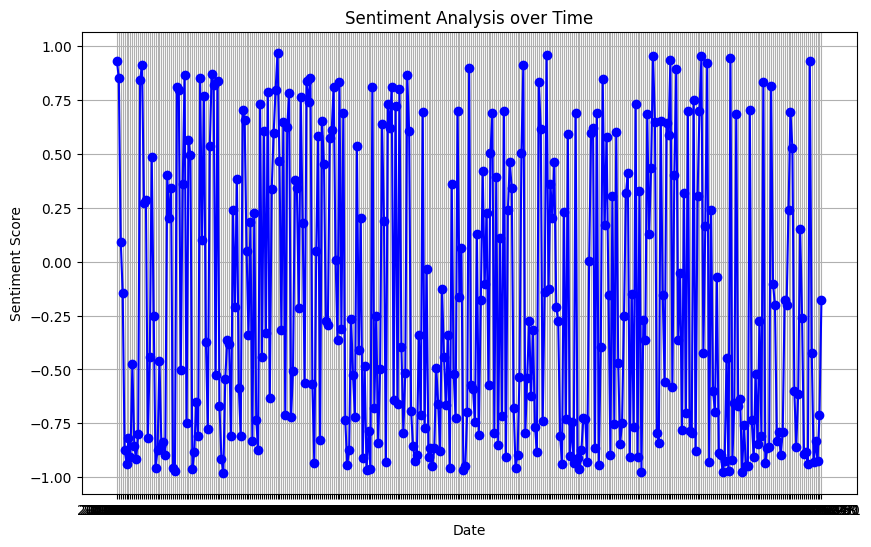

In [47]:
import matplotlib.pyplot as plt
# 날짜를 x축으로 하는 선 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(result_df['Date'], result_df['sentiment'], marker='o', linestyle='-', color='b')

# 그래프에 레이블과 제목 추가
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis over Time')

# 그리드 추가
plt.grid(True)

# 그래프 보여주기
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 예시로 DataFrame을 생성
result_df = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'compound': [-0.5154, 0.1179, 0.4215, 0.6597, 0.0000]
})

# 선 그래프로 표시
plt.plot(result_df['compound'], marker='o')
plt.title('Sentiment Analysis Compound Scores')
plt.xlabel('Index')
plt.ylabel('Compound Score')
plt.grid(True)
plt.show()
